# Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings(action = 'ignore')
plt.style.use('dark_background')

In [21]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [22]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [23]:
#checkin the dataset distribution
data['churn'].value_counts()/len(data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

In [24]:
#separating dependent and independent varirables
X = data.drop(columns = ['churn' , 'customer_id'])
Y = data['churn']

In [25]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_x = scaler.fit_transform(X)

In [26]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test,y_train,y_test = tts(scaled_x, Y,train_size = 0.80, stratify= Y)

x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building , Pridiction and odds ratio

In [27]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [28]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)  #Predicting Class
predicted_probabilities = classifier.predict_proba(x_test)  

In [29]:
predicted_values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
predicted_probabilities,predicted_probabilities.shape 

(array([[0.59677259, 0.40322741],
        [0.60866285, 0.39133715],
        [0.56510371, 0.43489629],
        ...,
        [0.42582884, 0.57417116],
        [0.50002383, 0.49997617],
        [0.62174931, 0.37825069]]),
 (4414, 2))

In [31]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2610,  949],
       [ 331,  524]], dtype=int64)

In [32]:
#Accuracy
classifier.score(x_test,y_test)

0.7100135931128229

In [33]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3557365919891378

In [34]:
#calculating the recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6128654970760234

In [35]:
f1 = 2/((1/Precision)+(1/Recall)) 
f1

0.45017182130584193

In [36]:
#claclatinf same form sklearn
from sklearn.metrics import f1_score 
F1 = f1_score(y_test,predicted_values)
F1

0.450171821305842

In [37]:
#calculating all 3 at once
from  sklearn.metrics import precision_recall_fscore_support as PRF_summary
PRF = PRF_summary(y_test,predicted_values)
PRF

(array([0.88745325, 0.35573659]),
 array([0.73335207, 0.6128655 ]),
 array([0.80307692, 0.45017182]),
 array([3559,  855], dtype=int64))

In [38]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values) 
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3559
           1       0.36      0.61      0.45       855

    accuracy                           0.71      4414
   macro avg       0.62      0.67      0.63      4414
weighted avg       0.78      0.71      0.73      4414



# Precision_Recall Curve

In [43]:
#gathering Precision/recall scores for diffrent thresholds
from sklearn.metrics import precision_recall_curve
Pp,Rp,Tp = precision_recall_curve(y_test,predicted_probabilities[:,1])
Pp.shape,Rp.shape,Tp.shape

((4415,), (4415,), (4414,))

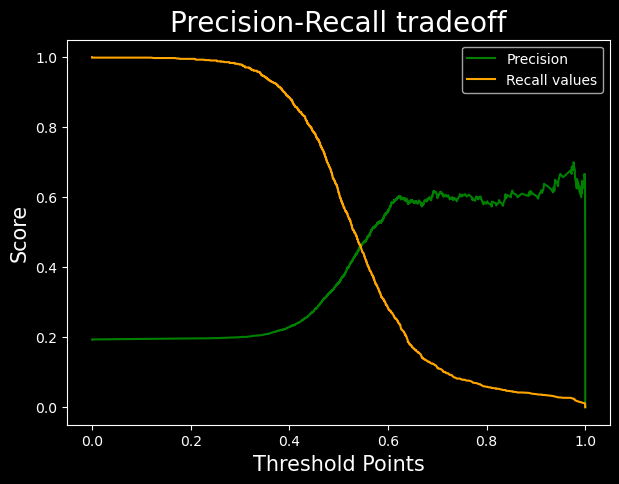

In [48]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(Tp, Pp[:-1], color ='green', label = 'Precision')
plt.plot(Tp, Rp[:-1],color ='orange',label = 'Recall values')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1]) 

0.7267006140433034

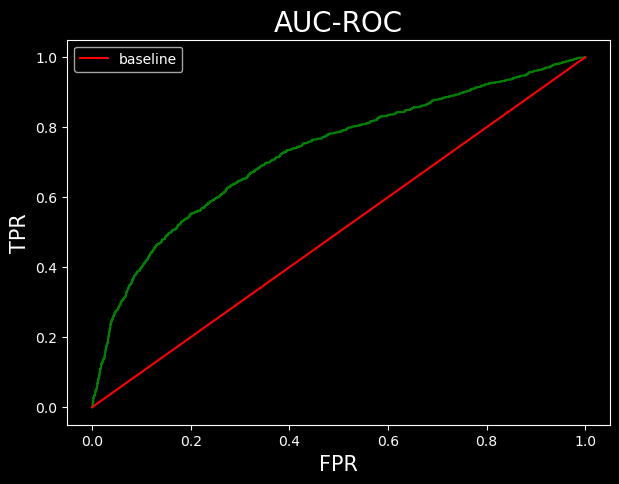

In [59]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(fpr, tpr, color ='green')
plt.plot([0,1],[0,1],color ='red',label = 'baseline')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR',fontsize = 15)
plt.title('AUC-ROC',fontsize='20')
plt.legend()
roc_auc_score(y_test, predicted_probabilities[:,1]) 

# Coefficient Plot

In [61]:
c= classifier.coef_.reshape(-1)
x=X.columns

coeff_plot = pd.DataFrame({
                          'coefficieants': c,
                           'variable' : x 
                              })

#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficieants')
coeff_plot.head()

,coefficieants,variable
9,-1.752749,current_balance
18,-0.393975,previous_month_balance
17,-0.353724,current_month_balance
13,-0.226126,current_month_credit
0,-0.173621,vintage


<BarContainer object of 19 artists>

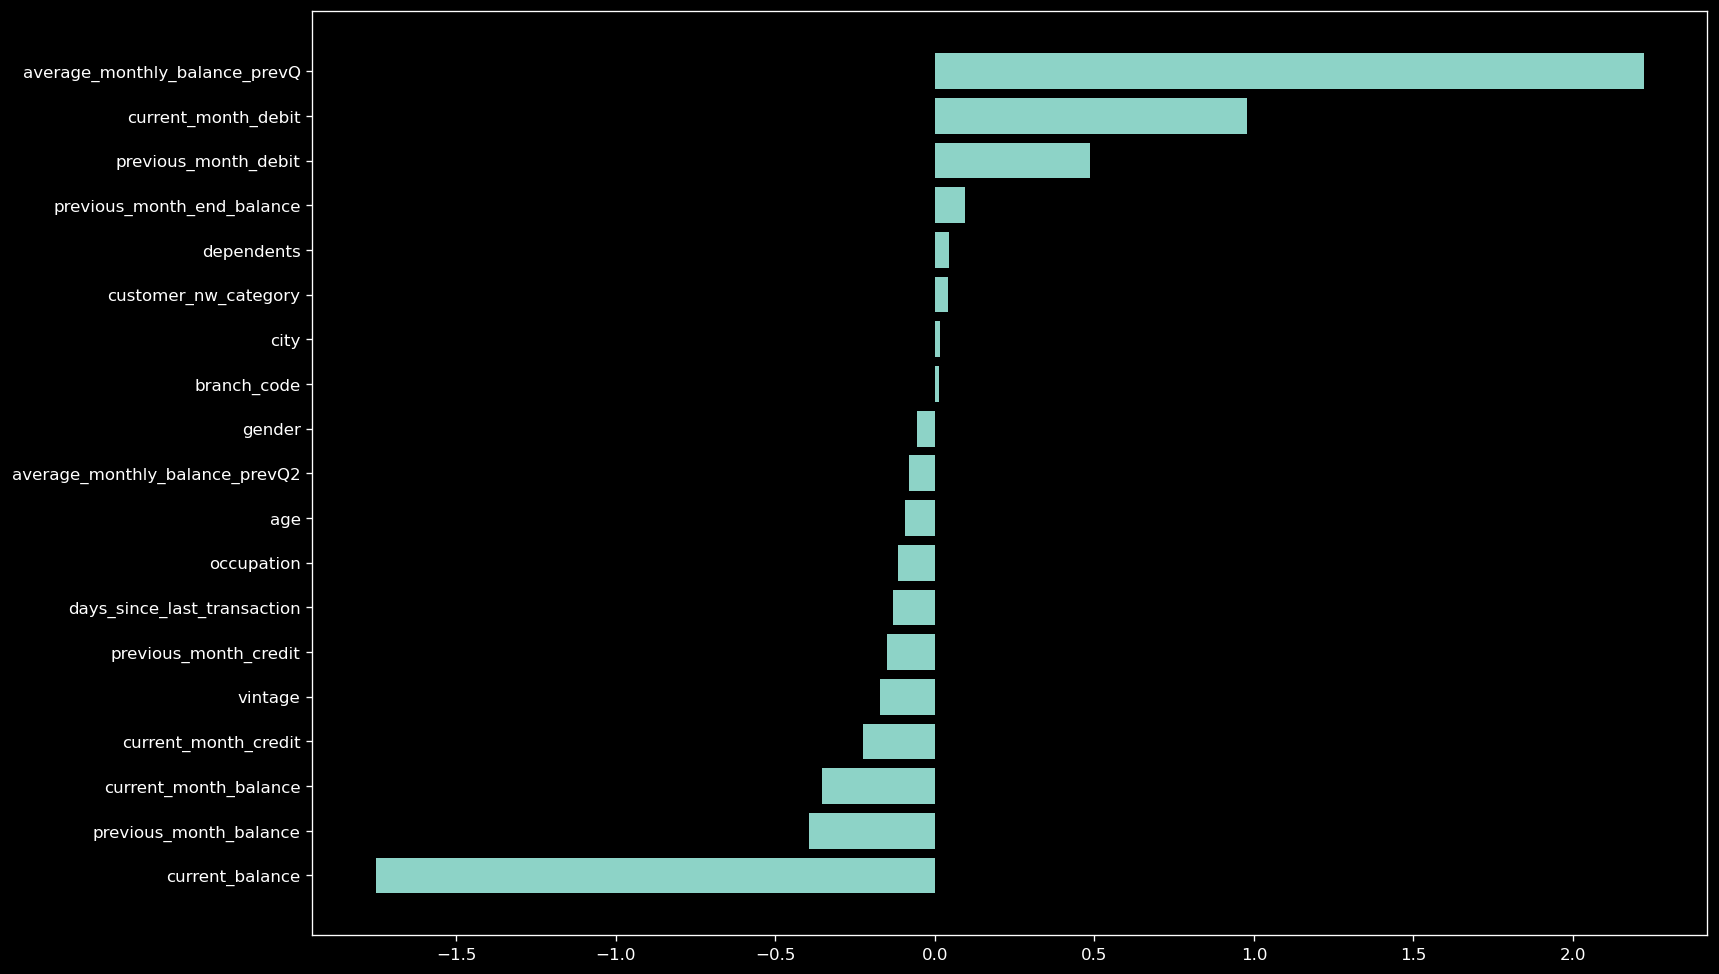

In [65]:
plt.figure(figsize = (15,10), dpi = 120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficieants'])